# ▶ **Training Linear Regression model on Student Performance Factors Dataset to estimate the Exam score of a student and comparing the results to a Multi Linear Regression model and Polynomial Regression model.**

In [ ]:
# mount google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip the dataset
!unzip "/content/drive/MyDrive/Student_Performance_Factors.zip" -d "/content/Student_Performance_Factors_Dataset"

Archive:  /content/drive/MyDrive/Student_Performance_Factors.zip
  inflating: /content/Student_Performance_Factors_Dataset/StudentPerformanceFactors.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load CSV (replace with actual filename after upload, e.g. "StudentPerformanceFactors.csv")
df = pd.read_csv("/content/Student_Performance_Factors_Dataset/StudentPerformanceFactors.csv")

# Display first 5 rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


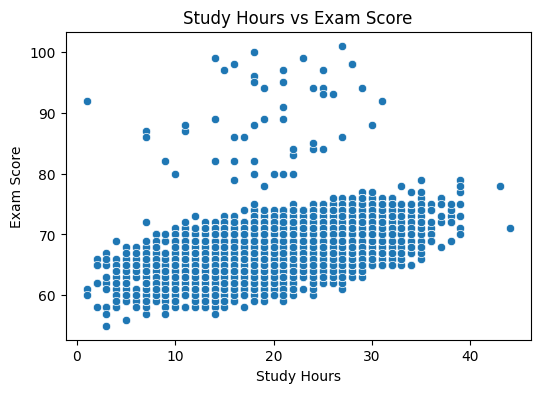

In [ ]:
# Scatter plot: Study Hours vs Exam Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [ ]:
#feature and Label selection
X = df[["Hours_Studied"]]   # Feature
y = df["Exam_Score"]     # Labels

In [ ]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#select the model
model = LinearRegression()
#train the model on the training features and labels
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 61.51116746904424
Slope: 0.285668744443087


In [ ]:
#now test the model
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison.head()

,Actual,Predicted
743,65,67.224542
5551,65,67.795880
3442,71,67.510211
6571,64,64.939192
4204,66,67.510211


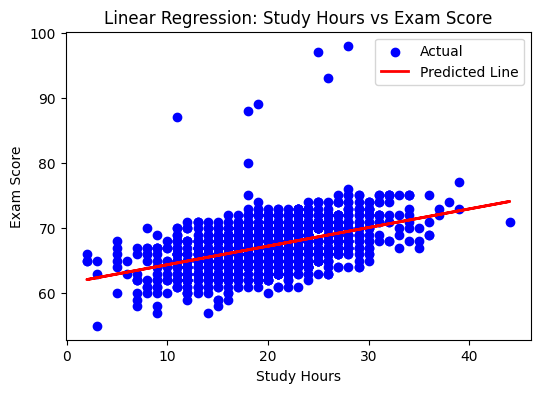

In [ ]:
# visualizing predections
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Study Hours vs Exam Score")
plt.legend()
plt.show()

In [ ]:
#model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 2.4475687452945643
Mean Squared Error (MSE): 10.85592128879332
Root Mean Squared Error (RMSE): 3.294832513010839
R² Score: 0.2319868674542106


## **> the model performance needs to be enhanced so we are using multi linear regression**

In [ ]:
# Features = all columns except Exam_Score
X_multi = df.drop("Exam_Score", axis=1)

# Target = Exam_Score
y_multi = df["Exam_Score"]

# Convert categorical columns to numeric (dummy variables)
X_multi = pd.get_dummies(X_multi, drop_first=True)

X_multi.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,True,False,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,True,False,False,True,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,False,True,False,True,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,True,False,False,True,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,False,True,False,True,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
#split the dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

print("Intercept:", multi_model.intercept_)

# Show feature coefficients
coef_df = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": multi_model.coef_
})
coef_df.sort_values(by="Coefficient", ascending=False)

Intercept: 41.9328207228083


,Feature,Coefficient
20,Peer_Influence_Positive,1.045440
13,Internet_Access_Yes,0.956229
25,Distance_from_Home_Near,0.833806
10,Extracurricular_Activities_Yes,0.585846
19,Peer_Influence_Neutral,0.560033
23,Parental_Education_Level_Postgraduate,0.524758
4,Tutoring_Sessions,0.508731
0,Hours_Studied,0.292928
24,Distance_from_Home_Moderate,0.286792
1,Attendance,0.198771


In [ ]:
#test the model
y_multi_pred = multi_model.predict(X_test_multi)

# Compare actual vs predicted scores
comparison_multi = pd.DataFrame({"Actual": y_test_multi, "Predicted": y_multi_pred})
comparison_multi.head()

,Actual,Predicted
743,65,64.541818
5551,65,65.237684
3442,71,71.536760
6571,64,64.269738
4204,66,66.526773


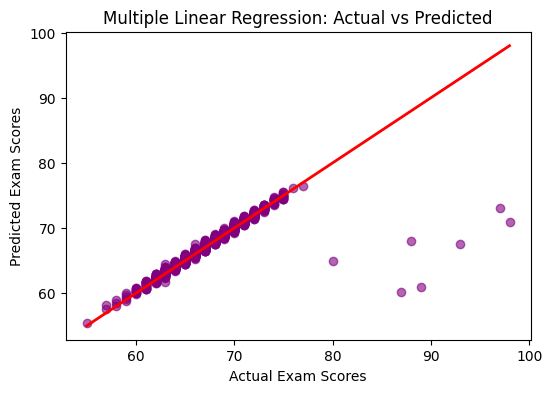

In [ ]:
#visualizing predictions
plt.figure(figsize=(6,4))
plt.scatter(y_test_multi, y_multi_pred, color="purple", alpha=0.6)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()],
         color="red", linewidth=2)  # 45° reference line
plt.show()

In [ ]:
#evaluate the model
mae_multi = mean_absolute_error(y_test_multi, y_multi_pred)
mse_multi = mean_squared_error(y_test_multi, y_multi_pred)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_multi_pred)

print("Multiple Linear Regression Performance:")
print("MAE:", mae_multi)
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("R² Score:", r2_multi)

Multiple Linear Regression Performance:
MAE: 0.45028541547009376
MSE: 3.256695866435405
RMSE: 1.8046317813990214
R² Score: 0.7696017567194432


## > as you can see model performance increased but still needs to be enhanced so we are using Polynomial Linear Regresssion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Use only StudyHours
X_poly = df[["Hours_Studied"]]
y_poly = df["Exam_Score"]

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [ ]:
# Create Polynomial Regression model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# test the model
y_poly_pred = poly_model.predict(X_test_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


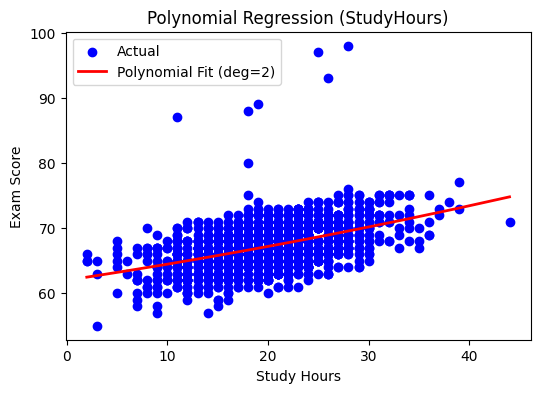

In [ ]:
# Sort values for smooth curve
X_sorted = np.sort(X_test_poly, axis=0)
y_sorted = poly_model.predict(X_sorted)

plt.figure(figsize=(6,4))
plt.scatter(X_test_poly, y_test_poly, color="blue", label="Actual")
plt.plot(X_sorted, y_sorted, color="red", linewidth=2, label="Polynomial Fit (deg=2)")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression (StudyHours)")
plt.legend()
plt.show()

In [ ]:
#evaluating the model
poly_mae = mean_absolute_error(y_test_poly, y_poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test_poly, y_poly_pred))
poly_r2 = r2_score(y_test_poly, y_poly_pred)

print("Polynomial Regression (StudyHours, degree=2)")
print("MAE:", poly_mae)
print("RMSE:", poly_rmse)
print("R²:", poly_r2)

Polynomial Regression (StudyHours, degree=2)
MAE: 2.4447795821288105
RMSE: 3.2931729586684346
R²: 0.23276034442853466


## as we can see the polynomial regression model gives better performance than the simple linear regression now let use multi polynomial regression and compare the performance

In [ ]:
# Features = all except Exam_Score
X_poly_multi = df.drop("Exam_Score", axis=1)
y_poly_multi = df["Exam_Score"]

# Encode categorical features
X_poly_multi = pd.get_dummies(X_poly_multi, drop_first=True)

# Split dataset
X_train_poly_multi, X_test_poly_multi, y_train_poly_multi, y_test_poly_multi = train_test_split(X_poly_multi, y_poly_multi, test_size=0.2, random_state=42)

In [ ]:
# Polynomial regression (degree=2, with multiple features)
poly_multi_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [ ]:
# Train model
poly_multi_model.fit(X_train_poly_multi, y_train_poly_multi)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# model testing
y_poly_multi_pred = poly_multi_model.predict(X_test_poly_multi)

In [ ]:
#model evaluation
poly_multi_mae = mean_absolute_error(y_test_poly_multi, y_poly_multi_pred)
poly_multi_rmse = np.sqrt(mean_squared_error(y_test_poly_multi, y_poly_multi_pred))
poly_multi_r2 = r2_score(y_test_poly_multi, y_poly_multi_pred)

print("Polynomial Regression (Multiple Features, degree=2)")
print("MAE:", poly_multi_mae)
print("RMSE:", poly_multi_rmse)
print("R²:", poly_multi_r2)

Polynomial Regression (Multiple Features, degree=2)
MAE: 0.637868305529267
RMSE: 1.8897960126411342
R²: 0.747342719593268


In [ ]:
# Compare Linear vs Polynomial Models
results = pd.DataFrame({
    "Model": ["Linear (1 Feature)", "Polynomial (1 Feature, deg=2)", "Linear (Multi Features)", "Polynomial (Multi Features, deg=2)"],
    "MAE": [mae, poly_mae, mae_multi, poly_multi_mae],
    "RMSE": [rmse, poly_rmse, rmse_multi, poly_multi_rmse],
    "R²": [r2, poly_r2, r2_multi, poly_multi_r2]
})

results

,Model,MAE,RMSE,R²
0,Linear (1 Feature),2.447569,3.294833,0.231987
1,"Polynomial (1 Feature, deg=2)",2.444780,3.293173,0.232760
2,Linear (Multi Features),0.450285,1.804632,0.769602
3,"Polynomial (Multi Features, deg=2)",0.637868,1.889796,0.747343


### > it appears that this data distribution has the best performance using the multiple linear regression model giving the highest R^2 value and the most nearly accurate predictions